In [ ]:
!pip install bertopic

In [ ]:
!pip install bert-extractive-summarizer

## 1. File Configuration
By running the following window you can upload the ulits.py, and NLP4News.py libraries, as well as any dataset.

This is done in order to access them in the notebook

In [1]:
from google.colab import files
files.upload()

Saving NLP4News.py to NLP4News.py


{'NLP4News.py': b'# from CS4490Z_Thesis.utils import testing_script\r\nfrom utils import MyDataset,Preprocess\r\nimport gensim.corpora as corpora\r\nimport gensim\r\nfrom sklearn.feature_extraction.text import CountVectorizer\r\nfrom sklearn.decomposition import LatentDirichletAllocation\r\nfrom sklearn.model_selection import GridSearchCV\r\nimport pandas as pd\r\nfrom matplotlib import pyplot as plt\r\nfrom wordcloud import WordCloud, STOPWORDS\r\nimport matplotlib.colors as mcolors\r\nimport seaborn as sns\r\nimport numpy as np\r\nfrom sklearn.manifold import TSNE\r\nfrom bokeh.plotting import figure, output_file, show\r\nfrom bokeh.models import Label\r\nfrom bokeh.io import output_notebook\r\nfrom matplotlib.patches import Rectangle\r\nfrom bertopic import BERTopic\r\nfrom nltk.corpus import stopwords\r\nfrom nltk.sentiment import SentimentIntensityAnalyzer\r\nfrom summarizer import Summarizer\r\nimport nltk\r\n\r\nclass LDA_Topic_Model:\r\n\r\n    def __init__(self, df, n_comp =[4

## 2. Creating an NLP_Controller
The first step to using this toolkit is to create a NLP_Controller object which you can use to deploy the various models included in it.

In [2]:
from NLP4News import NLP_Controller

con = NLP_Controller('Articles.csv')

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## 3. Creating and Model and Accessing its Data
Using the NLP_Controller object we can create a variety of models using our dataset whithout worrying about specific preprocessing tasks which are handeled by the controller for each model. 

###3.1. Topic Modelling with BERT

In [7]:
bert_topic_model = con.tm_bert()

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/516 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [16]:
bert_topic_model.get_num_topics()

64

In [17]:
bert_topic_model.get_topic_desc()

,Topic,Count,Name
0,-1,793,-1_england_cricket_have_was
1,0,142,0_yen_tokyo_shares_markets
2,1,125,1_oil_crude_prices_barrel
3,2,87,2_china_chinese_beijing_investment
4,3,71,3_bangladesh_india_wickets_overs
...,...,...,...
59,58,11,58_sammy_indies_england_jordan
60,59,11,59_coup_turkey_turkish_tourism
61,60,10,60_bank_development_sector_financing
62,61,10,61_pso_kapco_debt_receivables


In [7]:
bert_topic_model.model.visualize_topics()

In [8]:
topics_over_time = bert_topic_model.model.topics_over_time(bert_topic_model.articles, bert_topic_model.topics, bert_topic_model.dates, nr_bins=20)
bert_topic_model.model.visualize_topics_over_time(topics_over_time, top_n_topics=bert_topic_model.get_num_topics())

In [9]:
x = bert_topic_model.get_topic_table()
x

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,48,43,12,52,6
1,2,0,14,19,32
2,0,17,2,32,19
3,0,32,2,50,19
4,1,10,22,47,12
...,...,...,...,...,...
2687,43,52,42,2,6
2688,2,6,15,42,3
2689,13,43,12,25,4
2690,2,60,14,0,40


###3.2. Topic Modelling With LDA

In [10]:
lda_topic_model = con.tm_lda()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Beginning vecorization
Vecorization complete
Beginning grid search
Completed grid search
Constructing LDA
Competed LDA


In [11]:
lda_topic_model.get_dominant_topics()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.7252,"country, project, company, year, economic, gov...","[government, decide, bring, public, transport,..."
1,1,1.0,0.6976,"percent, oil, market, price, cut, high, year, ...","[hong_kong, asian, market, start, upswe, limit..."
2,2,1.0,0.5579,"percent, oil, market, price, cut, high, year, ...","[share, open, percent, low, follow, tepid, lea..."
3,3,1.0,0.6312,"percent, oil, market, price, cut, high, year, ...","[hong_kong, asian, market, tumble, follow, pai..."
4,4,1.0,0.7156,"percent, oil, market, price, cut, high, year, ...","[oil, price, slip, barrel, first, time, year, ..."
...,...,...,...,...,...
2687,2687,2.0,0.5166,"country, project, company, year, economic, gov...","[begin, implement, ban, laptop, tablet, busy, ..."
2688,2688,0.0,0.4764,"year, strong, include, time, world, team, peop...","[strong, former, stand, test, time, country, l..."
2689,2689,0.0,0.3571,"year, strong, include, time, world, team, peop...","[ground, fleet, car, pende, investigation, cra..."
2690,2690,2.0,0.6134,"country, project, company, year, economic, gov...","[strong, plan, finance, asian, infrastructure,..."


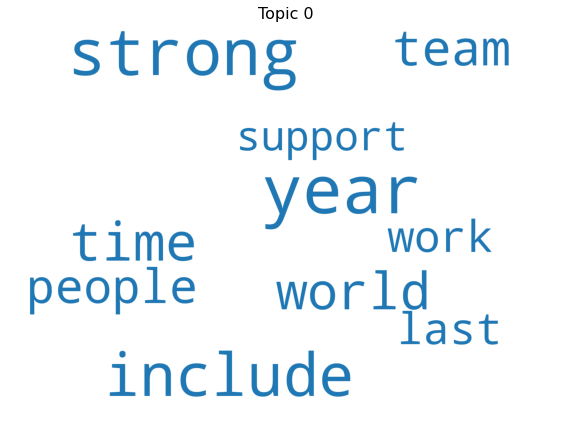

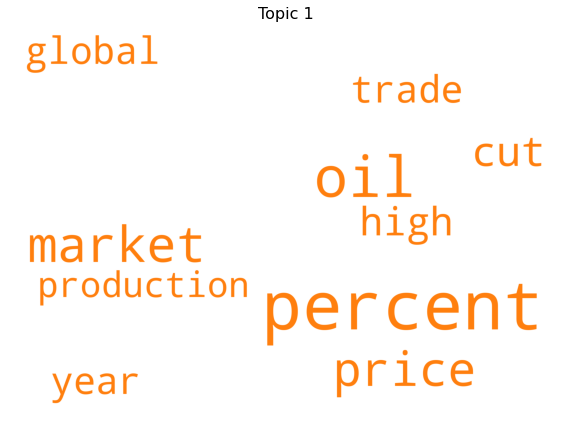

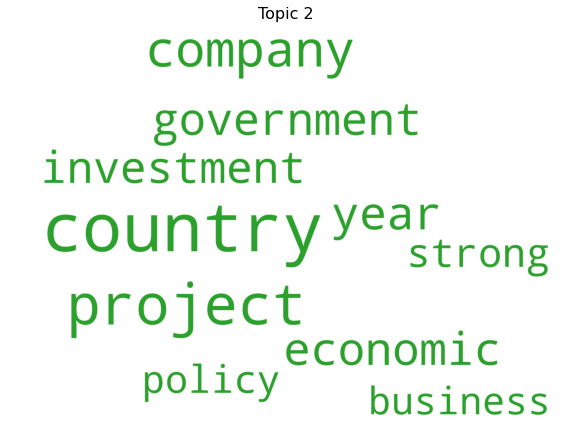

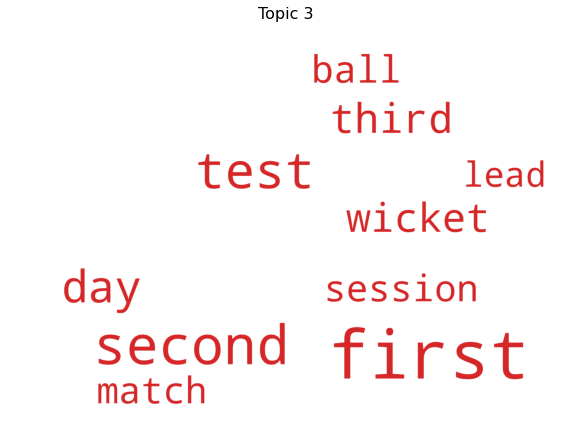

In [12]:
for i in range(4):

  lda_topic_model.get_topic_word_cloud(i)

# lda_topic_model.get_topic_word_cloud(1)

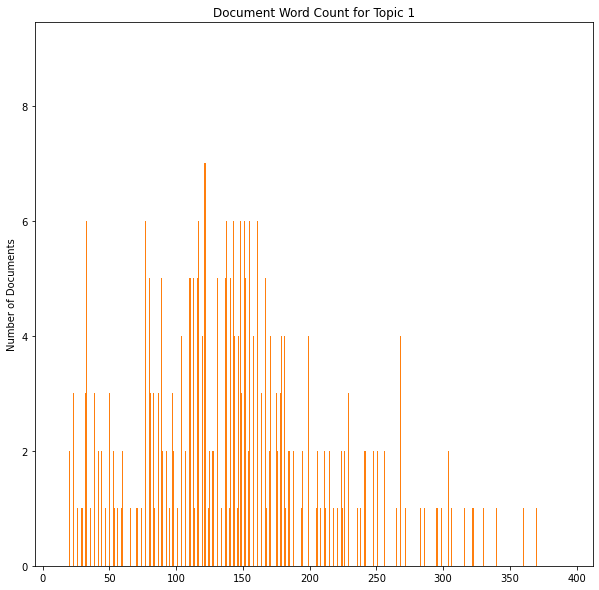

In [13]:
lda_topic_model.get_topic_word_dist(1)

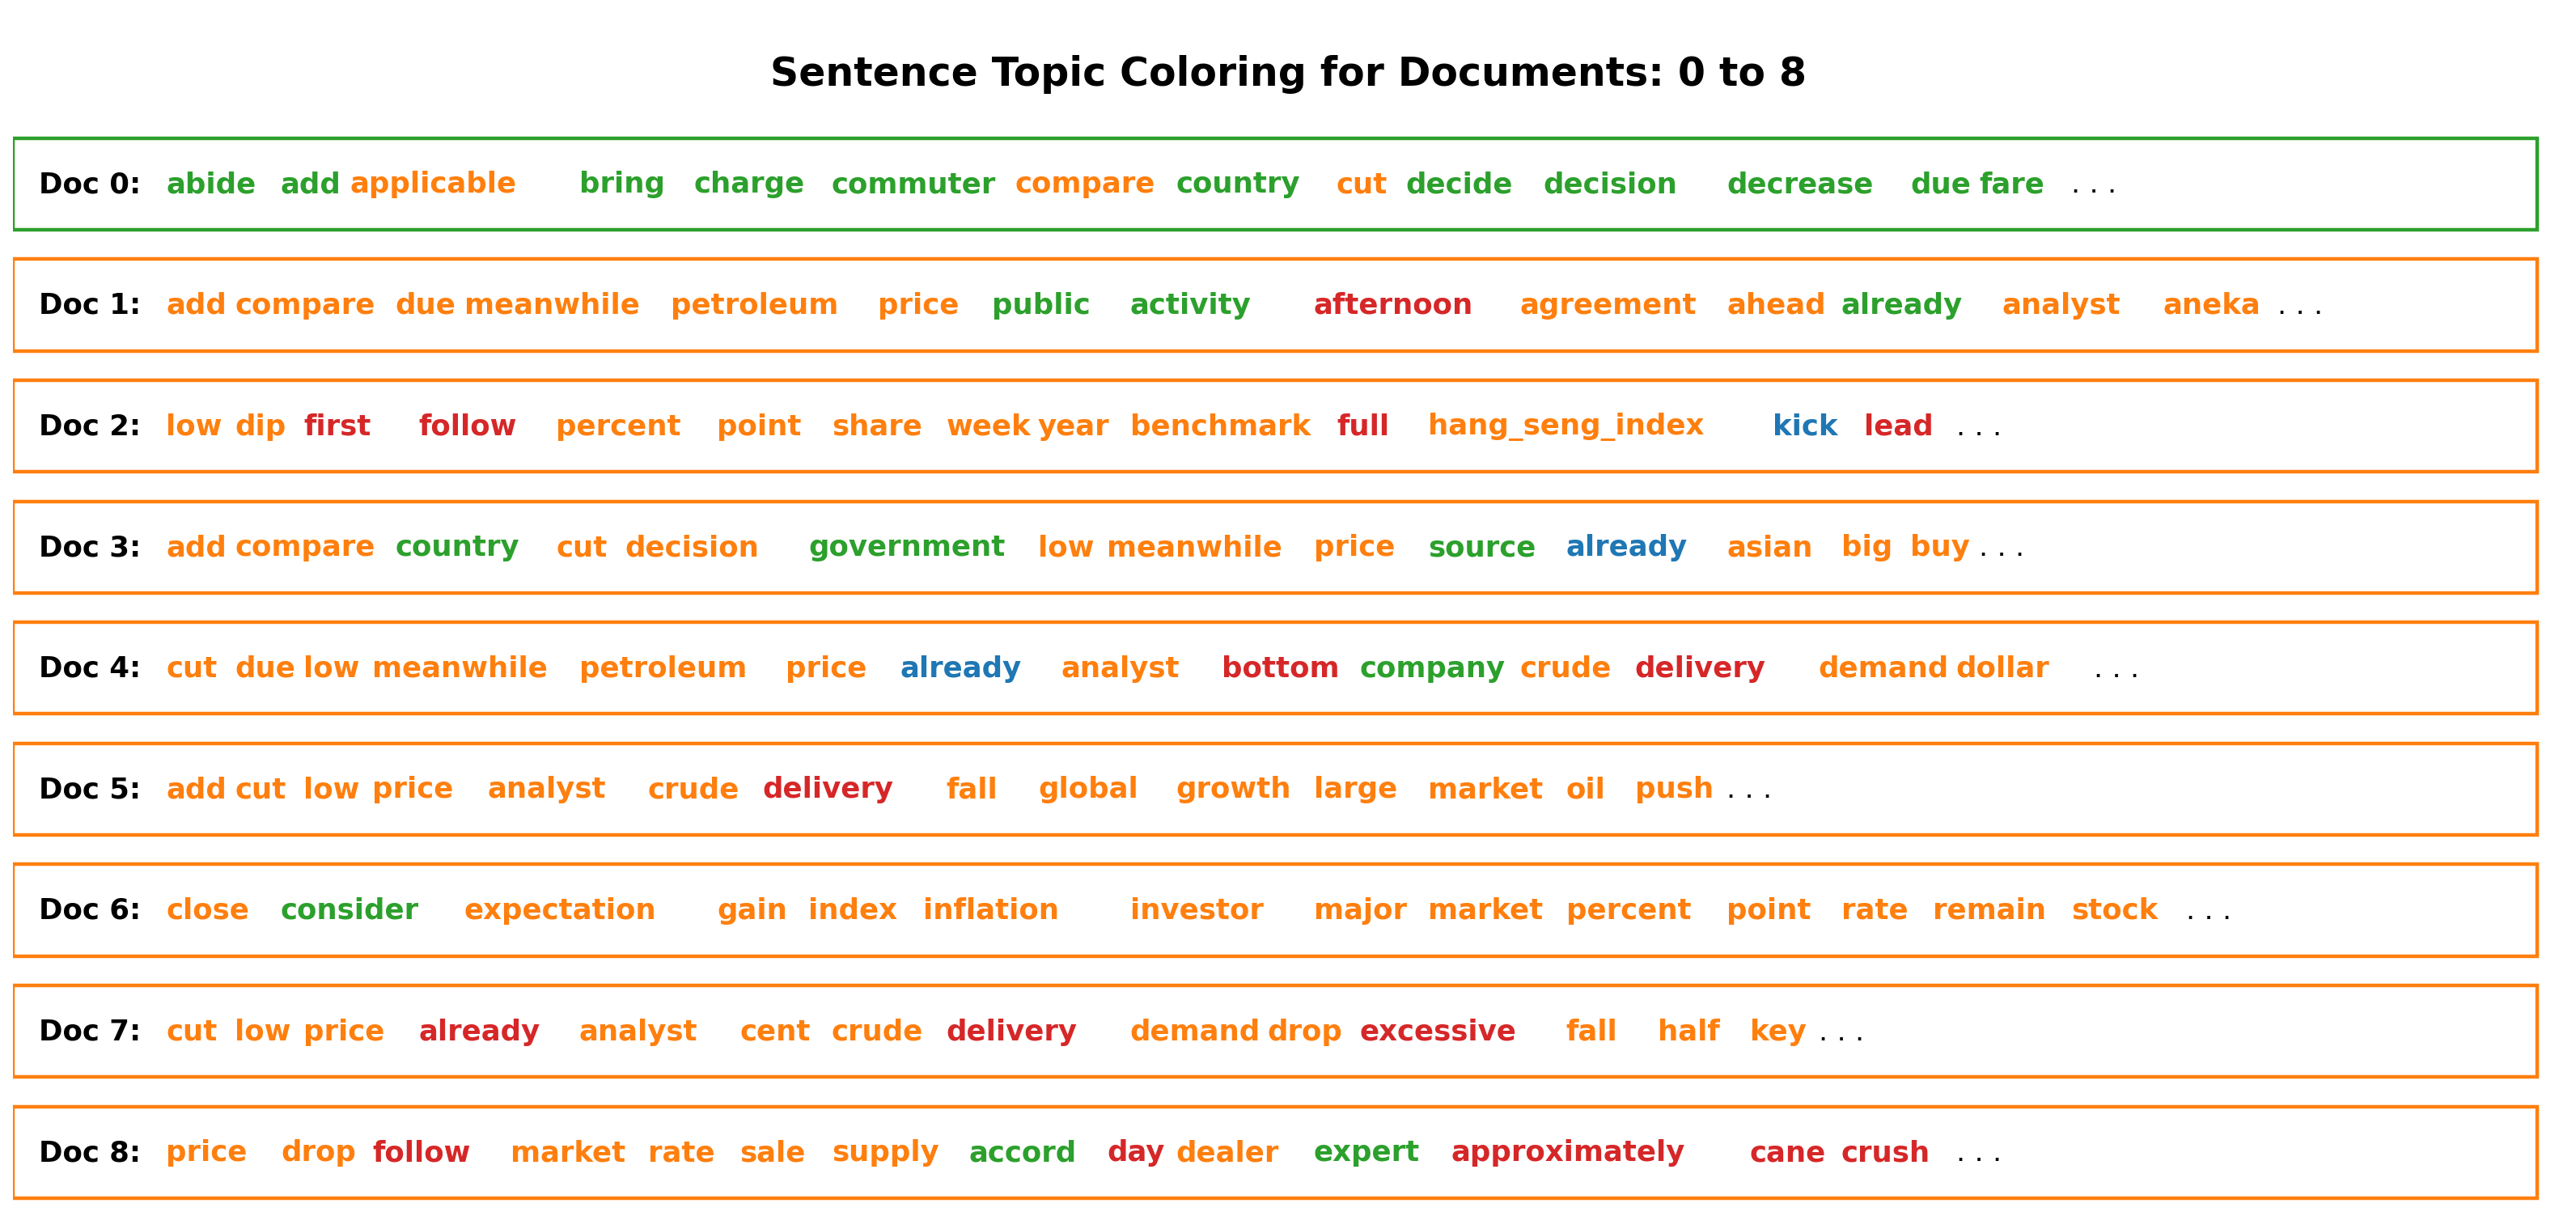

<Figure size 432x288 with 0 Axes>

In [14]:
lda_topic_model.get_sentence_colors(0,10)

In [15]:
lda_topic_model.get_sne_cluster()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2672 samples in 0.002s...
[t-SNE] Computed neighbors for 2672 samples in 0.052s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2672
[t-SNE] Computed conditional probabilities for sample 2000 / 2672
[t-SNE] Computed conditional probabilities for sample 2672 / 2672
[t-SNE] Mean sigma: 0.034182
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.258781
[t-SNE] KL divergence after 1000 iterations: 0.635544


<Figure size 432x288 with 0 Axes>

In [18]:
# !pip install numpy==1.20.0

###3.3. Sentinment Analysis with VADER

In [21]:
vader_model = con.sa_vader()

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
vader_model.get_text_polarity()

,Polarity
0,-0.2732
1,0.0000
2,-0.2960
3,0.0000
4,0.0000
...,...
2687,-0.5574
2688,0.0000
2689,0.0000
2690,0.0000


###3.4. Summarization with BERT

In [3]:
bert_sum_model = con.sum_bert()

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
bert_sum_model.get_spec_text_sum(100,1)

"ISLAMABAD: Pakistan's central bank has received $500 million from the International Monetary Fund (IMF) as the sixth loan tranche of an ongoing aid arrangement to support economic reforms and growth, sources told Geo News on Wednesday."